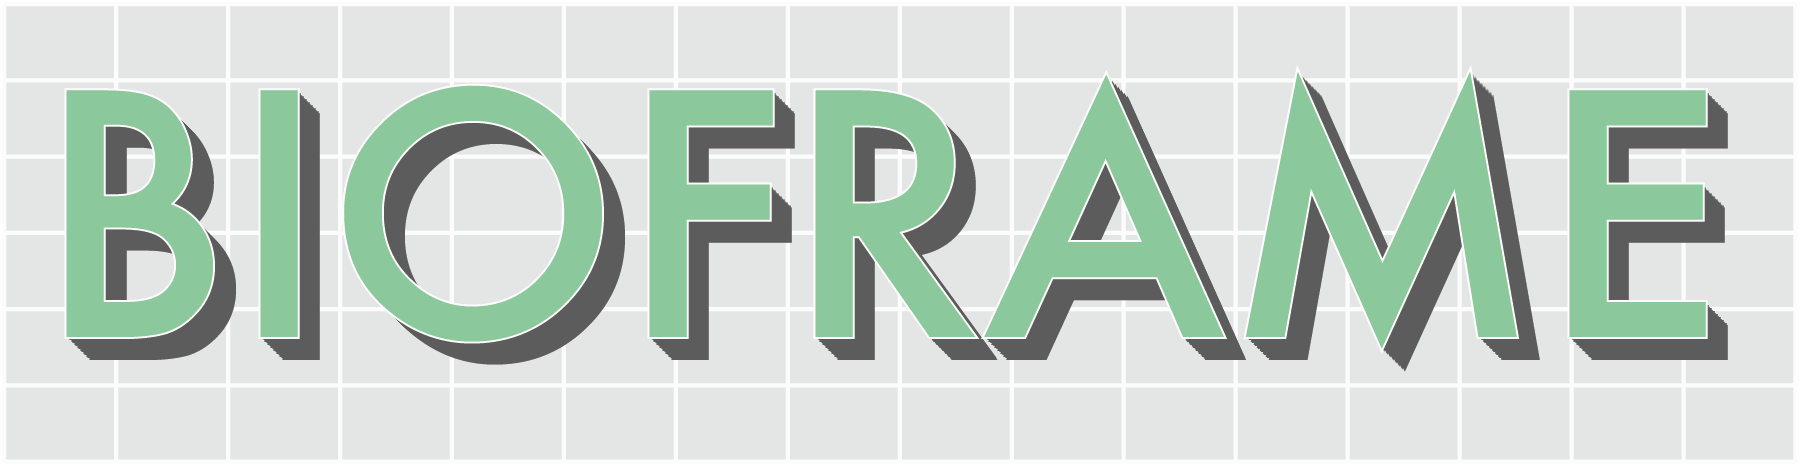

Bioframe enables flexible and scalable operations on Pandas **dataframes** of **genomic intervals**.

A sequenced genome provides a common **coordinate system** for locating features of interest.

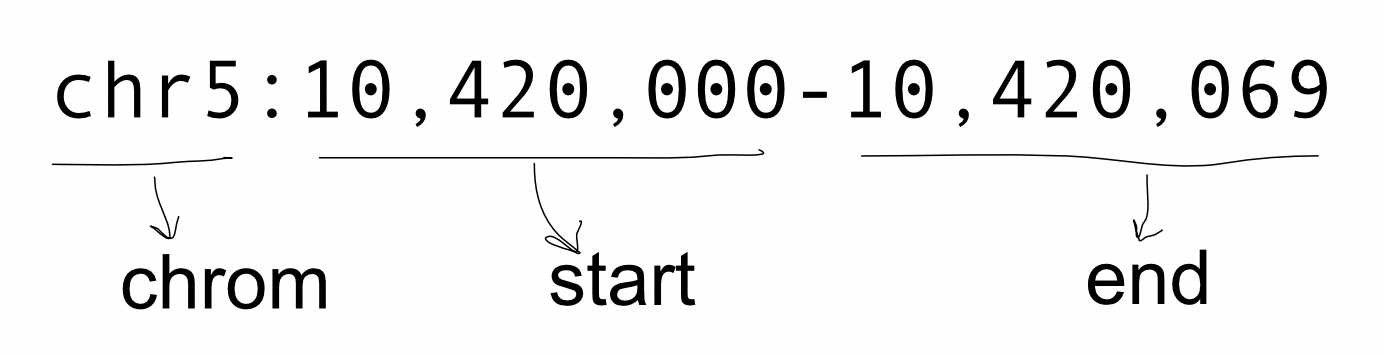

Positions and intervals provide addresses for anything that can be mapped to a [reference genome](https://en.wikipedia.org/wiki/Reference_genome):

* Alignments of short sequencing reads
* Sites of genetic variation
* Individual genes and their substructual components
* Locations occupied by DNA-binding proteins in particular cell types
* And much more!

It is no wonder that positions and intervals are key fields in most genomic data files.

In [ ]:
!pip install bioframe

# Problem

Genomic intervals are one of the most prevalent data structures in computational genome biology, and used to represent features ranging from genes, to DNA binding sites, to disease variants. Operations on genomic intervals provide a language for asking questions about relationships between features. 

While there are excellent interval arithmetic tools for the command line, they are not smoothly integrated into Python, one of the most popular general-purpose computational and visualization environments.


# Enter bioframe

Bioframe is a library to enable flexible and performant operations on genomic interval dataframes in Python. Bioframe extends the Python data science stack to use cases for computational genome biology by building directly on top of two of the most commonly-used Python libraries, numpy and pandas.

The bioframe API enables flexible name and column orders, and decouples operations from data formats to avoid unnecessary conversions, a common scourge for bioinformaticians. Bioframe achieves these goals while maintaining high performance and a rich set of features.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bioframe

## Interval arithmetic

Toy examples with plots

## Performance

Figure from paper

## File I/O

## Other utilities

## Example workflow

In [ ]:
ctcf_peaks = bioframe.read_table(
    "https://www.encodeproject.org/files/ENCFF401MQL/@@download/ENCFF401MQL.bed.gz", 
    schema='narrowPeak'
)

In [ ]:
ctcf_peaks

,chrom,start,end,name,score,strand,fc,-log10p,-log10q,relSummit
0,chr19,48309541,48309911,.,1000,.,5.04924,-1.0,0.00438,185
1,chr4,130563716,130564086,.,993,.,5.05052,-1.0,0.00432,185
2,chr1,200622507,200622877,.,591,.,5.05489,-1.0,0.00400,185
3,chr5,112848447,112848817,.,869,.,5.05841,-1.0,0.00441,185
4,chr1,145960616,145960986,.,575,.,5.05955,-1.0,0.00439,185
...,...,...,...,...,...,...,...,...,...,...
40582,chr8,22574315,22574744,.,1000,.,561.11939,-1.0,4.90268,243
40583,chr15,56246029,56246402,.,1000,.,569.05663,-1.0,4.90268,191
40584,chr1,150979463,150979845,.,1000,.,580.28482,-1.0,4.90268,194
40585,chr16,57649040,57649402,.,1000,.,602.95266,-1.0,4.90268,173


In [ ]:
jaspar_url = 'http://expdata.cmmt.ubc.ca/JASPAR/downloads/UCSC_tracks/2022/hg38/'
jaspar_motif_file = 'MA0139.1.tsv.gz'
ctcf_motifs = bioframe.read_table(
    jaspar_url + jaspar_motif_file,
    schema='jaspar',
    skiprows=1
)

In [ ]:
ctcf_motifs

,chrom,start,end,name,score,pval,strand
0,chr1,11163,11182,CTCF,811,406,-
1,chr1,11222,11241,CTCF,959,804,-
2,chr1,11280,11299,CTCF,939,728,-
3,chr1,11339,11358,CTCF,837,455,-
4,chr1,11401,11420,CTCF,829,439,-
...,...,...,...,...,...,...,...
770044,chrY_KI270740v1_random,4600,4619,CTCF,815,412,-
770045,chrY_KI270740v1_random,5601,5620,CTCF,815,412,-
770046,chrY_KI270740v1_random,7601,7620,CTCF,815,412,-
770047,chrY_KI270740v1_random,8602,8621,CTCF,815,412,-


In [ ]:
df = bioframe.overlap(
    ctcf_peaks, 
    ctcf_motifs, 
    # suffixes=('_1', ''), 
    return_index=True,
    how='left',
)

fraction of peaks without motifs 0.14


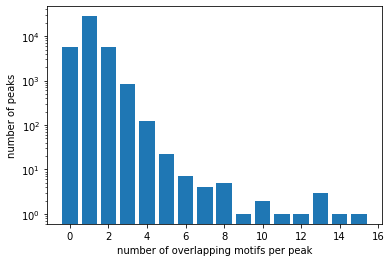

In [ ]:
motifs_per_peak = df.groupby(["index"])["index_"].count().values

bins = np.arange(0, np.max(motifs_per_peak))
counts, _ = np.histogram(motifs_per_peak, bins)
plt.bar(bins[:-1], height=counts, align='center')
plt.xlabel('number of overlapping motifs per peak')
plt.ylabel('number of peaks')
plt.semilogy();

print(f'fraction of peaks without motifs {np.round(np.sum(motifs_per_peak==0)/len(motifs_per_peak),2)}');

In [ ]:
df

,index,chrom,start,end,name,score,strand,fc,-log10p,-log10q,relSummit,index_,chrom_,start_,end_,name_,score_,pval_,strand_
0,0,chr19,48309541,48309911,.,1000.0,.,5.04924,-1.0,0.00438,185.0,<NA>,None,<NA>,<NA>,None,NaN,NaN,None
1,1,chr4,130563716,130564086,.,993.0,.,5.05052,-1.0,0.00432,185.0,<NA>,None,<NA>,<NA>,None,NaN,NaN,None
2,2,chr1,200622507,200622877,.,591.0,.,5.05489,-1.0,0.00400,185.0,<NA>,None,<NA>,<NA>,None,NaN,NaN,None
3,3,chr5,112848447,112848817,.,869.0,.,5.05841,-1.0,0.00441,185.0,<NA>,None,<NA>,<NA>,None,NaN,NaN,None
4,4,chr1,145960616,145960986,.,575.0,.,5.05955,-1.0,0.00439,185.0,<NA>,None,<NA>,<NA>,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48626,40584,chr1,150979463,150979845,.,1000.0,.,580.28482,-1.0,4.90268,194.0,40407,chr1,150979668,150979687,CTCF,925.0,678.0,-
48627,40585,chr16,57649040,57649402,.,1000.0,.,602.95266,-1.0,4.90268,173.0,261215,chr16,57649185,57649204,CTCF,918.0,656.0,-
48628,40585,chr16,57649040,57649402,.,1000.0,.,602.95266,-1.0,4.90268,173.0,261216,chr16,57649229,57649248,CTCF,829.0,439.0,+
48629,40586,chr12,54379625,54380042,.,1000.0,.,627.60723,-1.0,4.90268,203.0,153951,chr12,54379782,54379801,CTCF,863.0,511.0,-


In [ ]:
%%bash

echo "Hello World"
which sed

Hello World
/bin/sed
